Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

Dataset link: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('D:\\Ineuron\\Credit_Card_Default_Prediction\\data\\external\\train.csv')

In [3]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [4]:
# Checking for any null values present
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Insight: No Missing Values present in the dataset

In [5]:
# Checking the size of the dataset
df.shape

(30000, 25)

In [6]:
# Checking if the data type is correct 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Insight: All the column values are having a correct Dtype.

In [7]:
# checking for any duplicate values
df.duplicated().sum()

0

In [10]:
df.tail(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Insights:

1. Average limit given to individuals is close 167,000 New Taiwan Dollars.
2. Customers are having a Age range between 21-79 with an Avg. age of 35 years.
3. Most of the customers getting the Credit card have their academics completed either till Graduate School or University.
4. Typical no. of customers getting the Credit card are having a 'Single' marital status.

In [12]:
# Dropping the ID column because of no relation with the Dependent feature
df.drop(columns='ID', inplace=True)

In [13]:
# Renamed the Target feature & One Independent Feature for better understanding
df.rename(columns={'default.payment.next.month': 'Default_Payment'}, inplace=True)
df.rename(columns={'MARRIAGE': 'Marital_Status'}, inplace=True)

In [14]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,Marital_Status,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [15]:
df['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

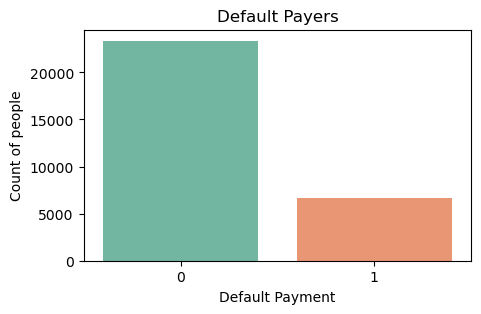

In [16]:
plt.figure(figsize=(5,3))
sns.countplot(x =df['Default_Payment'], data = df, palette = "Set2")
plt.title('Default Payers')
plt.xlabel('Default Payment')
plt.ylabel('Count of people')
plt.show()

**Insight:** The total no. of Defaulters are far less in compare to the Credit card holders who pay 'ON-TIME'. 

Total % of customers who will Default next month is `28.38%` out of the total customers which is `23,364`.

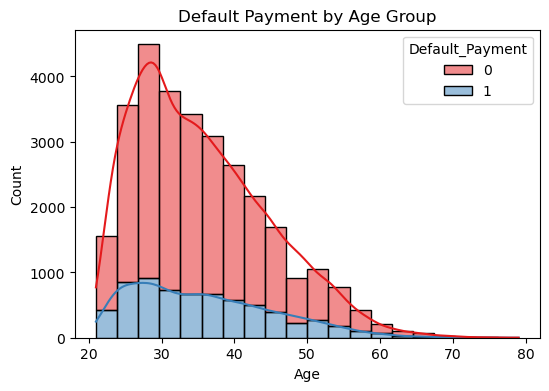

In [56]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='AGE', hue='Default_Payment', bins=20, multiple='stack', palette='Set1', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Default Payment by Age Group')
plt.show()

**Insight:** From the above Hist plot we can see that the People between the Age group `25-30` are likely to default more in compare to other Age groups. Let's try and explore more about this by using another Plot.

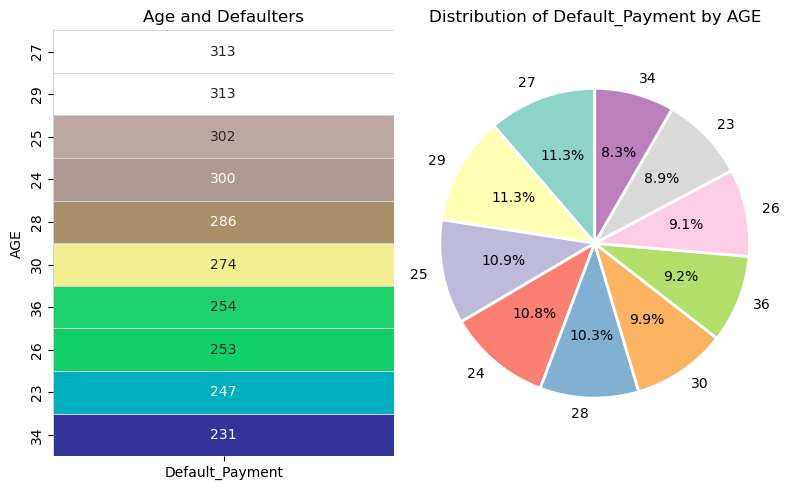

In [69]:
AgeWiseDefault = df[['AGE', 'Default_Payment']].groupby(['AGE'], axis=0).sum().sort_values('Default_Payment', ascending=False)[:10]

palette = "Set3"

fig, axes = plt.subplots(1, 2, figsize=(8, 5))

axes[0].set_title('Age and Defaulters')
sns.heatmap(AgeWiseDefault, annot=True, fmt='d', cmap='terrain', cbar=False, linewidths=0.5, linecolor='lightgray', ax=axes[0])

axes[1].set_title("Distribution of Default_Payment by AGE")
axes[1].pie(AgeWiseDefault["Default_Payment"], labels=AgeWiseDefault.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette(palette), wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
axes[1].axis("equal")

plt.tight_layout() 
plt.show()


**Insight**:
As we have already seen using the Hist plot above most of the defaulters are ranging between the Age of `25 - 30`. Now, to further emphasise on this we can see that max % of defaulters are belonging to the Age of 27 & 29 followed by 25, 24 & 28 and so on. 

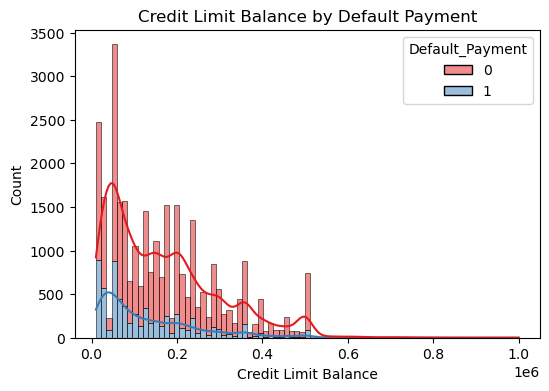

In [54]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='LIMIT_BAL', hue='Default_Payment', multiple='stack', palette='Set1', kde= True)
plt.xlabel('Credit Limit Balance')
plt.ylabel('Count')
plt.title('Credit Limit Balance by Default Payment')
plt.show()

C:\Users\resha\AppData\Local\Temp\ipykernel_9732\2945964459.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(method='spearman'), annot=True, cmap = 'viridis')


<Axes: >

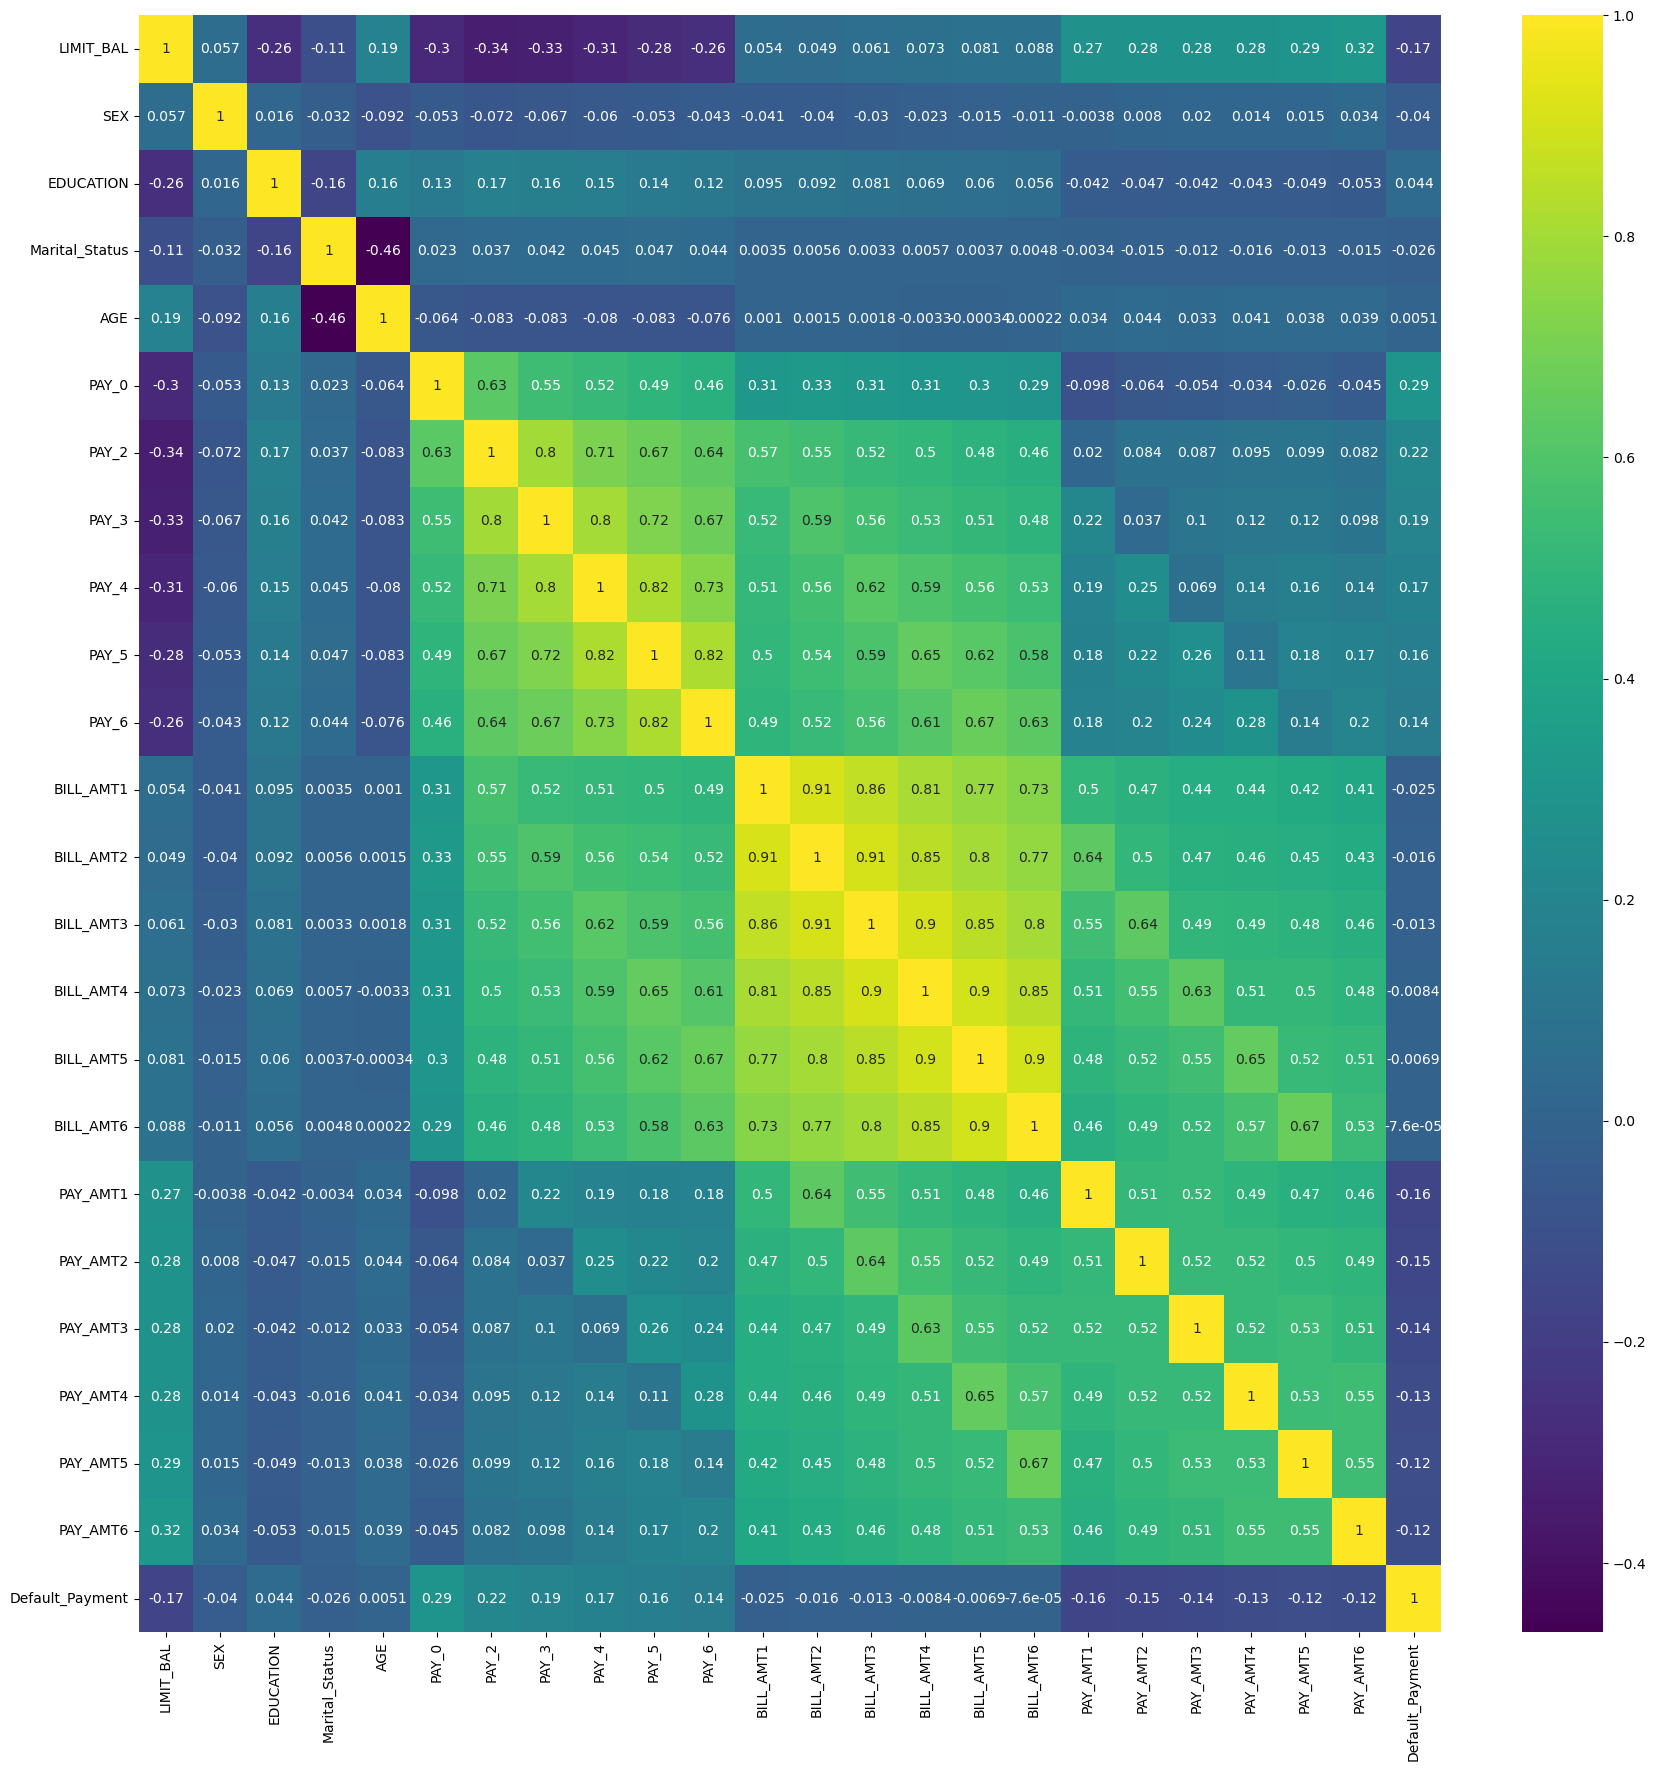

In [59]:
plt.figure(figsize=(21,21))
sns.heatmap(data=df.corr(method='spearman'), annot=True, cmap = 'viridis')

**Insights:**

1. `Limit Balance` is `negatively` correlated to Default payment which could mean customers with `higher` credit limit have more sense of responsibility and less likely to default. 
2. `SEX` is `negatively` correlated to Default payment which means as the value shifts more towards `Female` side who're having the value of 2 they're less likely to default. But, we will use some other plots to get a better understanding in the later steps.
3. `Education` & `Age` are `postively` correlated which means as the value of these 2 fields decreases the Default value will reduce and get closer to 0 as well. 
4. All the `Repayment status` (Pay_0 till Pay_6) fields are `positively` correlated to the target feature which means there is an inverse relationship. As the values of these field increases the probability of the Target feature belonging to class 1 will increase.
5. Amount of `Previous payment` & `Bill statement` are `negatively` correlated to the target feature which means there is an inverse relationship. As the values of these field increases the probability of the Target feature belonging to class 0 will increase. 

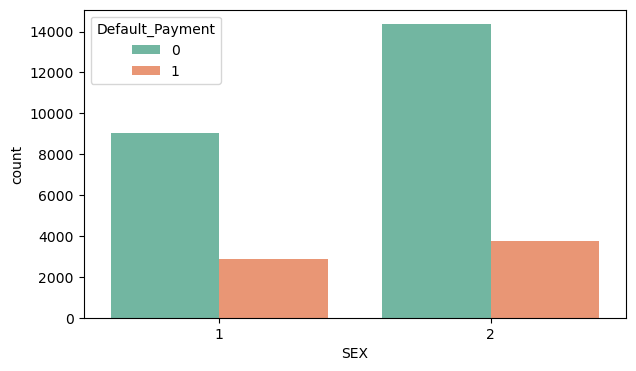

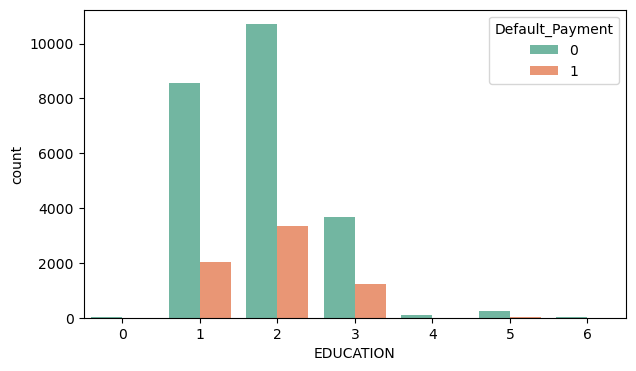

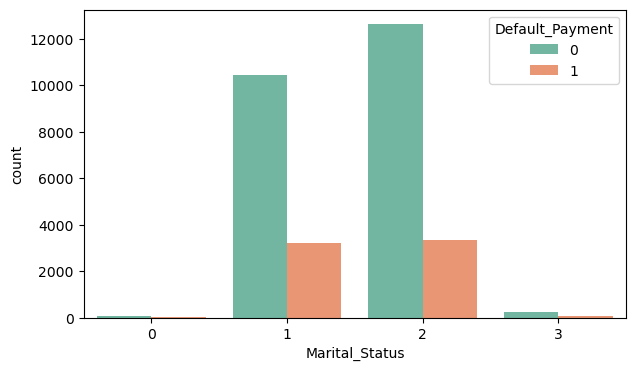

In [25]:
for i in df[['SEX', 'EDUCATION', 'Marital_Status']]:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=i, hue=df['Default_Payment'], palette="Set2")
    plt.xlabel(i)
    plt.show()

**Insights:** 

* `Gender` -> In terms of SEX females are defaulting more in compare to males as per the count plot above.
* `Education` -> Customers having an education of University are defaulting more followed by graduate school and high school.
* `Marital Status` -> Both Single & Married people are defaulting almost on a similar scale. Not much of a difference we can notice. 